In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import os
import pandas as pd

0.10753096960000003 1.5647693800000004


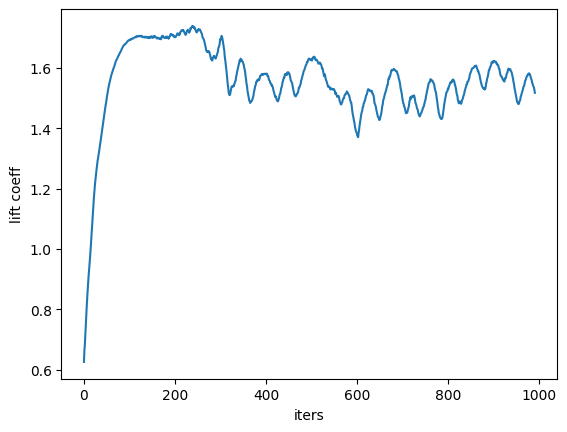

In [5]:
coeffs = np.loadtxt("../aoasweepNREL1e5/GRTsteady16Mesh8/"+
                   "postProcessing/forceCoeffs/0/forceCoeffs.dat", skiprows=9, delimiter="\t")
coeff = np.mean(coeffs[-100:], axis=0)

plt.plot(coeffs[10:,3])
plt.xlabel("iters")
plt.ylabel("lift coeff")
#plt.axhline(y=coeff[3], c='r')
print(coeff[2], coeff[3])

In [2]:
def get_aoasweep_data(sweepdir):

    cwd = os.getcwd()
    files = os.listdir(sweepdir)
    files = np.array(files)
    coefficients = np.zeros((len(files),3))
    angles = np.arange(-6, 18, 2)

    sfiles = [ifile.replace("GRTsteady", "") for ifile in files]
    sfiles = np.array([ifile.replace("Mesh8", "") for ifile in sfiles]).astype(int)
    #print(sfiles)

    files = files[sfiles.argsort()]
    #print(files)

    for i, file in enumerate(files):
        os.chdir(os.path.join(sweepdir,file))
        coefs = np.loadtxt("postProcessing/forceCoeffs/0/forceCoeffs.dat", skiprows=9 , delimiter="\t")
        coefsmean = np.mean(coefs[-100:], axis=0)
        #print(coefs)
        coefficients[i, 1] = coefsmean[2]
        coefficients[i, 2] = coefsmean[3]

        os.chdir(cwd) 
    return sorted(files), coefficients, angles

In [3]:
sweepdir = "../aoasweep/"
cl_data = pd.read_csv("./data/Cl_data.csv")
cd_data = pd.read_csv("./data/Cd_data.csv")
files, coefs, angles = get_aoasweep_data(sweepdir)

In [4]:
ind = np.where(np.isin(cl_data["aoa"], angles))
clexp = np.array(cl_data["400k"])[ind]
cdexp = np.array(cd_data["400k"])[ind]

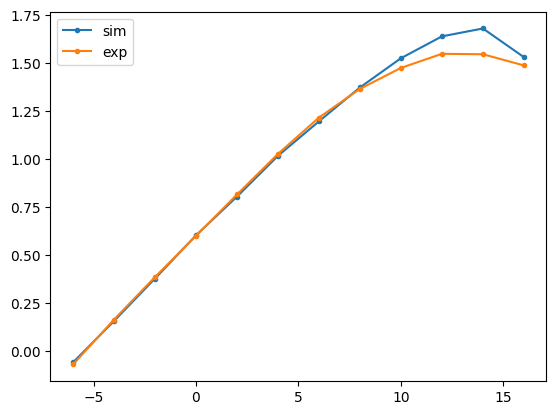

In [5]:
plt.plot(angles, coefs[:,2],marker=".", label="sim")
plt.plot(angles, clexp,marker=".",label="exp")
plt.legend()
plt.show()

In [6]:
# 
A1 = np.trapz(coefs[:,2])
A2 = np.trapz(clexp)
A_err_rel = 100*(A1-A2)/A2

In [11]:
a = (coefs[:,2] - clexp)
er = 100*np.abs(a/clexp)
rmse = np.sqrt(np.sum(a**2/a.shape[0]))

In [12]:
print("Relative errors: ", er, "\n RMSE: ", rmse, "\n Relative area error: ",A_err_rel)

Relative errors:  [15.30390358  4.59263232  2.0196601   0.36941463  1.33446811  0.97261953
  1.61834224  0.5360476   3.42174883  5.87214858  8.67879933  2.8975279 ] 
 RMSE:  0.05128370827124414 
 Relative area error:  2.3598688103619936


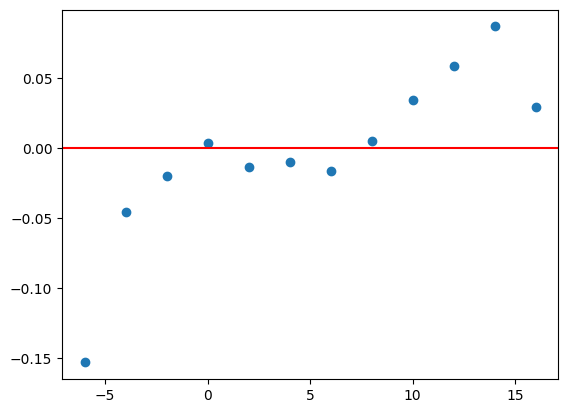

In [57]:
plt.scatter(angles, a)
plt.axhline(y=0, c="r")